In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [487]:
park= pd.read_csv("Park.csv")

In [488]:
park.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [8]:
park.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [11]:
park.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

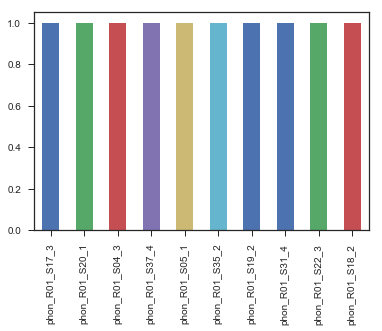

In [70]:
park.iloc[:,0].value_counts().head(10).plot.bar()

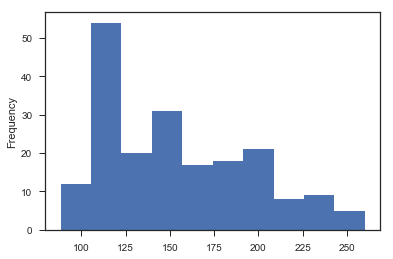

In [22]:
park.iloc[:,1].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

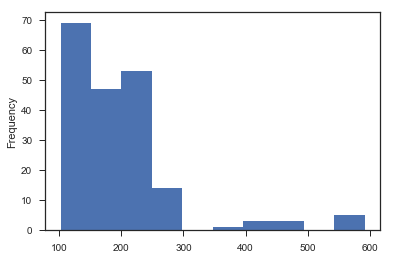

In [23]:
park.iloc[:,2].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

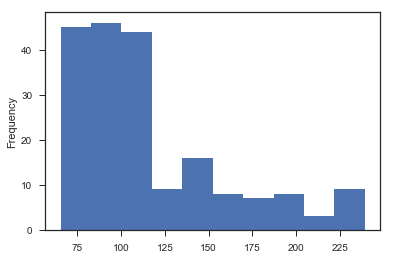

In [45]:
park.iloc[:,3].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

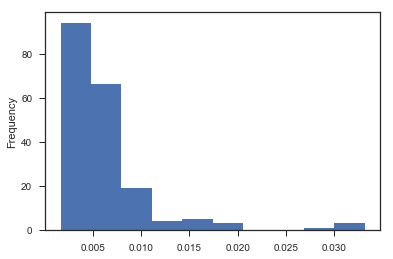

In [25]:
park.iloc[:,4].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

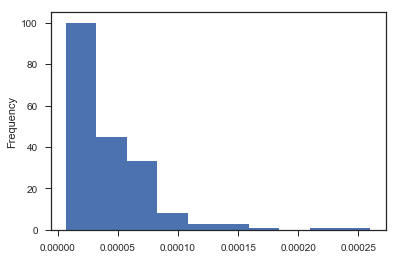

In [26]:
park.iloc[:,5].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

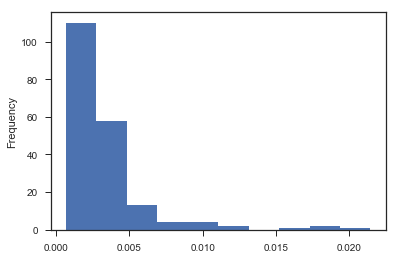

In [27]:
park.iloc[:,6].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

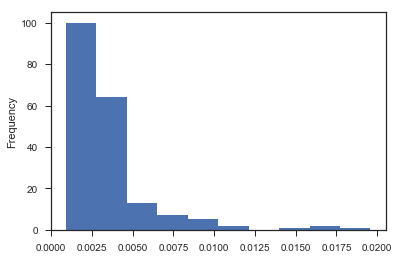

In [28]:
park.iloc[:,7].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

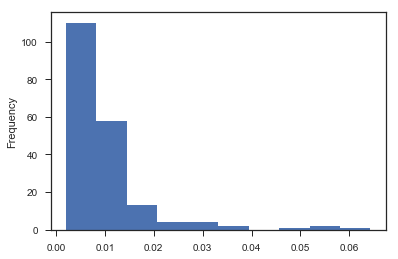

In [29]:
park.iloc[:,8].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

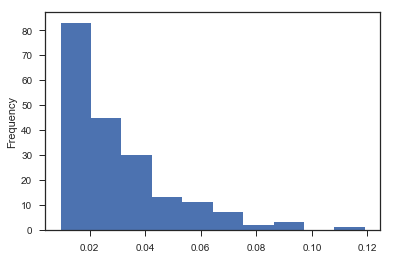

In [30]:
park.iloc[:,9].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

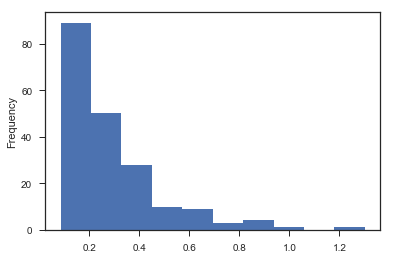

In [31]:
park.iloc[:,10].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

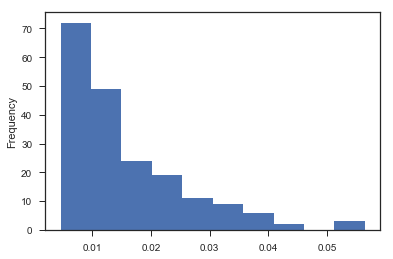

In [32]:
park.iloc[:,11].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

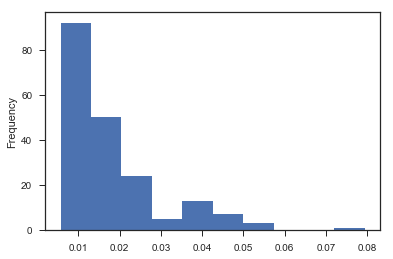

In [33]:
park.iloc[:,12].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

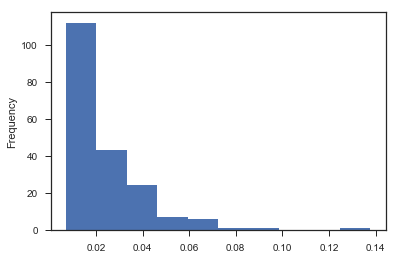

In [34]:
park.iloc[:,13].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

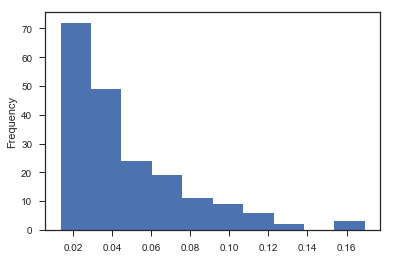

In [35]:
park.iloc[:,14].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

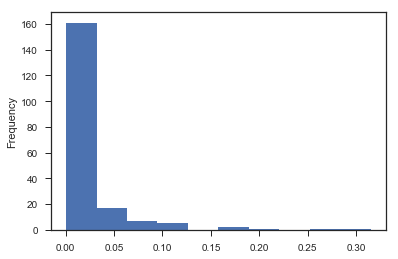

In [36]:
park.iloc[:,15].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

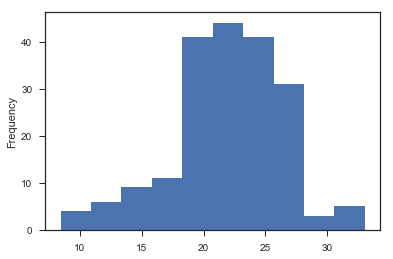

In [37]:
park.iloc[:,16].plot.hist()

In [ ]:
#The distribution is somewhat normal thought skewed right a bit

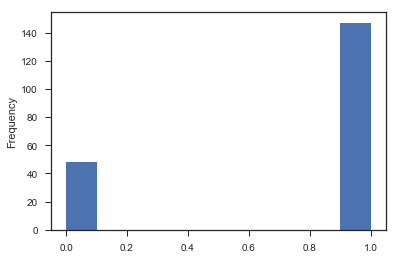

In [38]:
park.iloc[:,17].plot.hist()

In [ ]:
#this seems to be a bategorical data

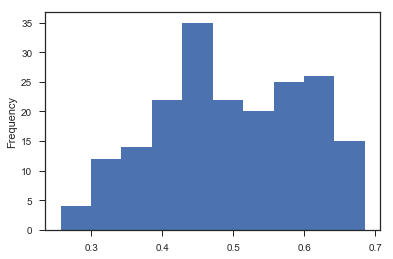

In [39]:
park.iloc[:,18].plot.hist()

In [ ]:
#The distribution doesn't follow any pattern and seems to be sort of noise

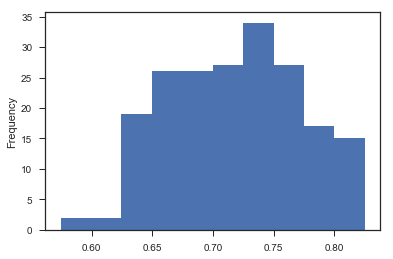

In [40]:
park.iloc[:,19].plot.hist()

In [ ]:
#The distribution doesn't follow any pattern and seems to be sort of noise

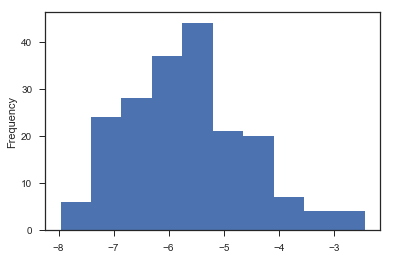

In [41]:
park.iloc[:,20].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

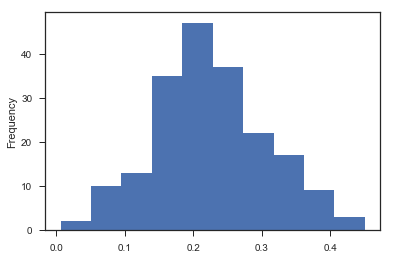

In [42]:
park.iloc[:,21].plot.hist()

In [ ]:
#The data is mostly normally distributed, doubtful if this will help

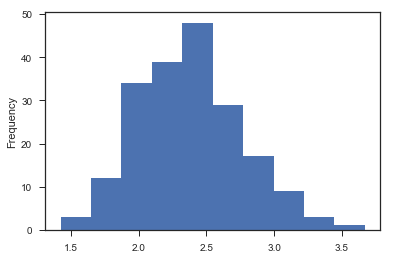

In [43]:
park.iloc[:,22].plot.hist()

In [ ]:
#The data is mostly normally distributed, doubtful if this will help

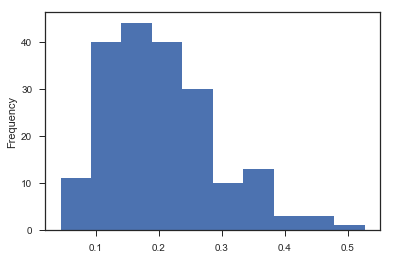

In [44]:
park.iloc[:,23].plot.hist()

In [ ]:
#The distribution is not not normal and skewed left

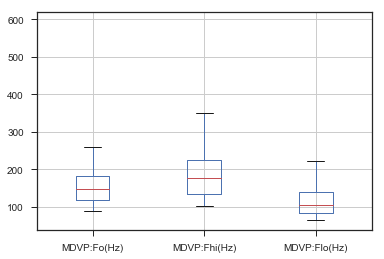

In [49]:
boxplot2 = park.boxplot(column=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'])

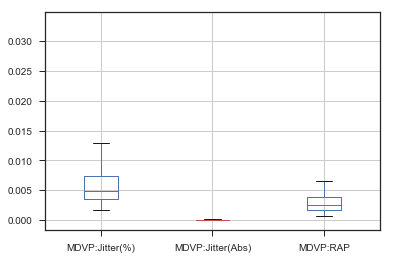

In [50]:
boxplot2 = park.boxplot(column=['MDVP:Jitter(%)', 'MDVP:RAP'])

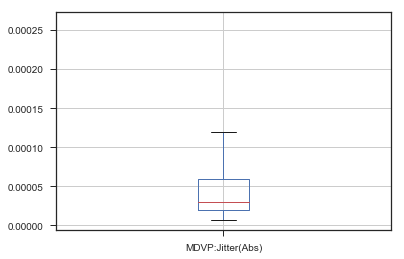

In [51]:
boxplot2 = park.boxplot(column=['MDVP:Jitter(Abs)'])

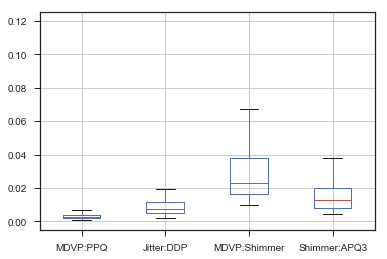

In [53]:
boxplot2 = park.boxplot(column=['MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer',  'Shimmer:APQ3'])

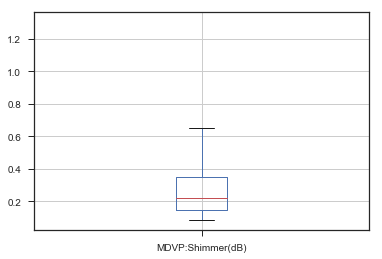

In [54]:
boxplot2 = park.boxplot(column=['MDVP:Shimmer(dB)'])

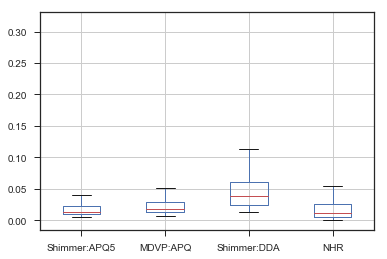

In [59]:
boxplot2 = park.boxplot(column=['Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA','NHR'])

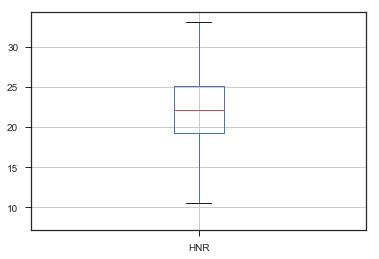

In [61]:
boxplot2 = park.boxplot(column=['HNR'])

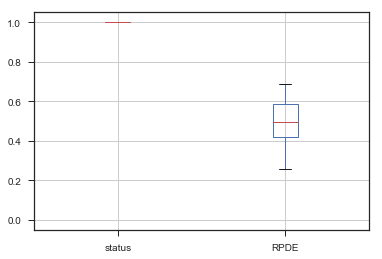

In [62]:
boxplot2 = park.boxplot(column=['status', 'RPDE'])

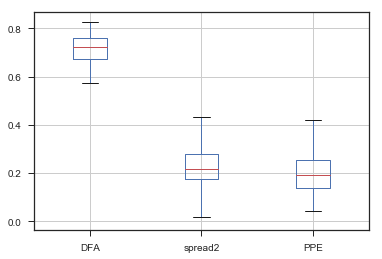

In [66]:
boxplot2 = park.boxplot(column=['DFA', 'spread2','PPE'])

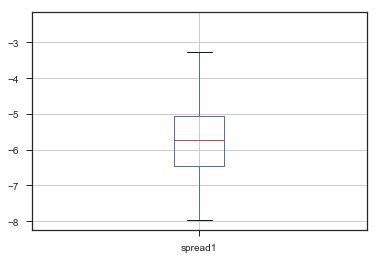

In [64]:
boxplot2 = park.boxplot(column=['spread1', ])

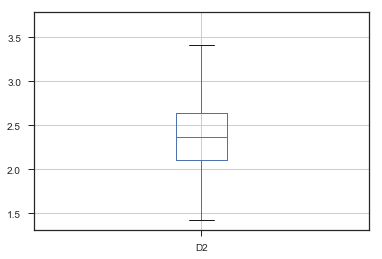

In [65]:
boxplot2 = park.boxplot(column=['D2'])

In [46]:
park.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

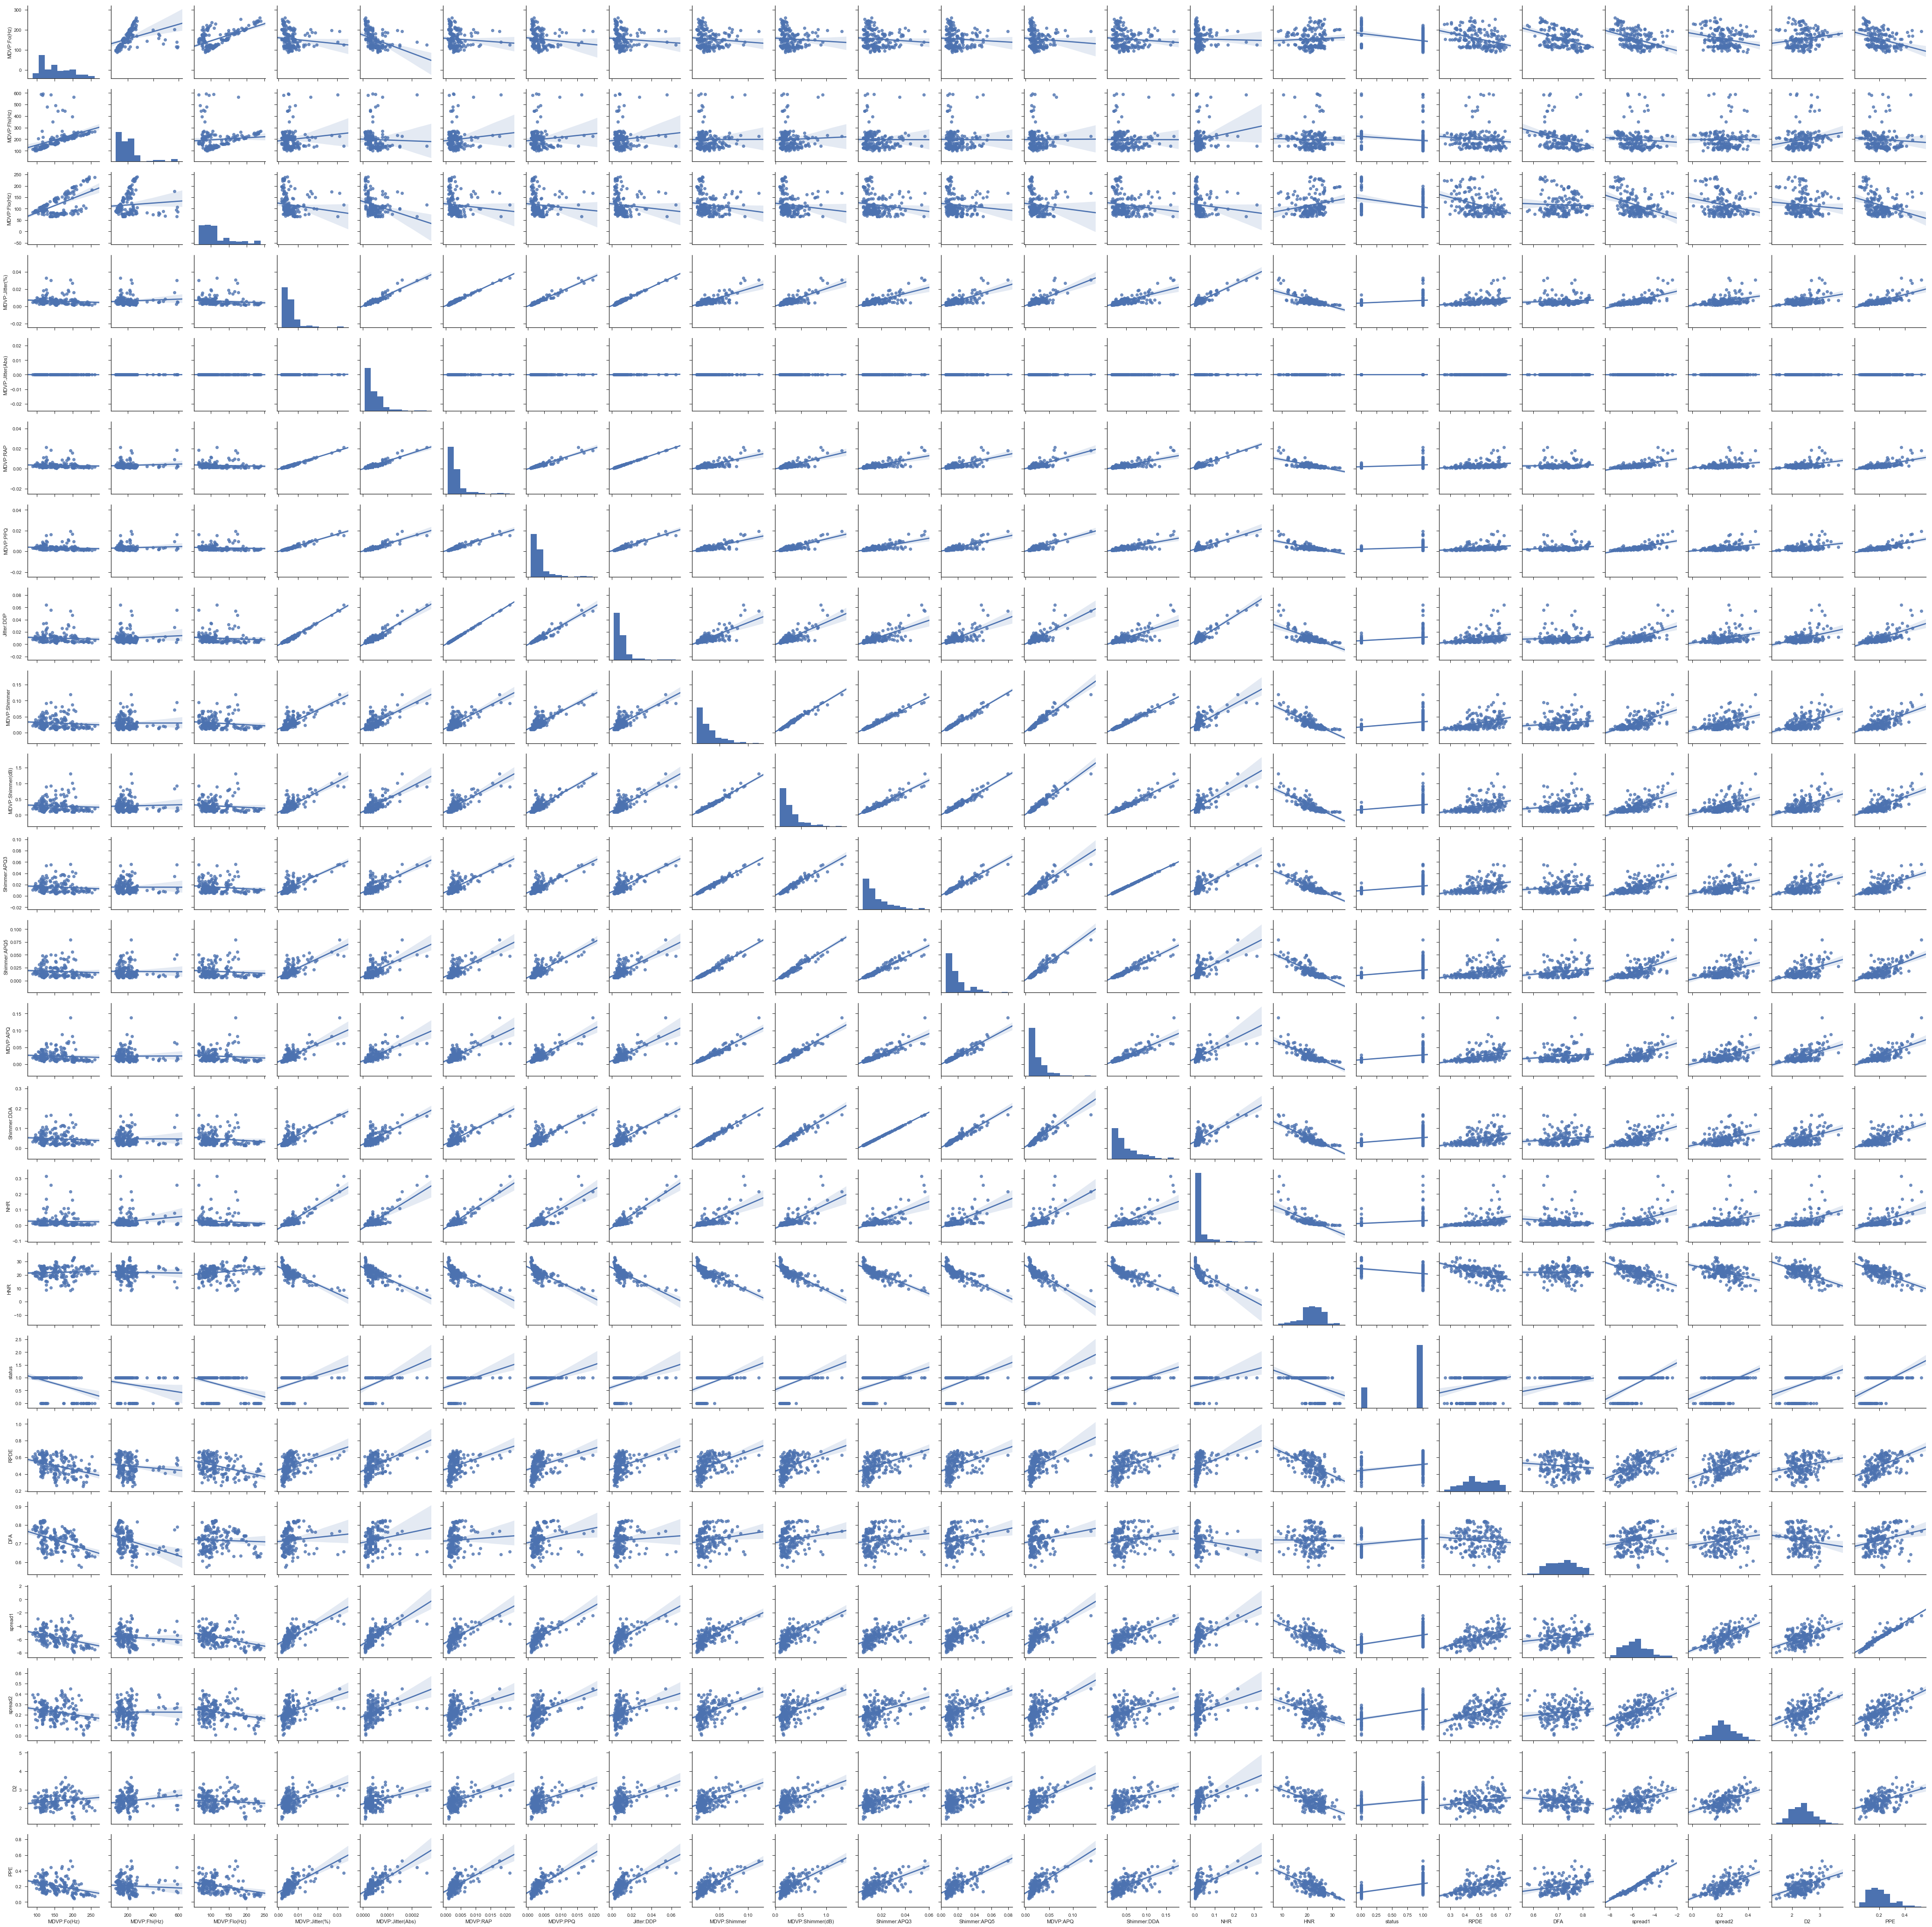

In [24]:
sns.pairplot(park, kind="reg")

In [126]:
from sklearn.model_selection import train_test_split
park1=park.iloc[:,1:24]
X =  park1.drop("status", axis=1)
y =  park1.pop("status")
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [127]:
park.iloc[:,1:24].head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [119]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
clf= clf_entropy.fit(train_set, train_labels)

In [129]:
pred= clf.predict(test_set)

In [130]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [131]:
confusion_matrix(test_labels, pred)

array([[13,  6],
       [ 1, 39]], dtype=int64)

In [132]:
accuracy_score(test_labels, pred)*100

88.13559322033898

In [368]:
clf_entropyreg = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=20, min_samples_leaf=6)
clfreg= clf_entropyreg.fit(train_set, train_labels)

In [369]:
predreg= clfreg.predict(test_set)
confusion_matrix(test_labels, predreg)

array([[14,  5],
       [ 1, 39]], dtype=int64)

In [370]:
accuracy_score(test_labels, predreg)*100

89.83050847457628

In [424]:
pd.crosstab(test_labels, predreg)

col_0,0,1
status,,
0,14,5
1,1,39


In [ ]:
#Hence regularization improves accuracy

In [548]:
corr = (np.corrcoef(park.iloc[:,1:24], rowvar=0))
K=pd.DataFrame(corr)

In [551]:
K.to_csv('K.csv', sep=',')


In [163]:
from sklearn.ensemble import RandomForestClassifier

In [478]:
rf = RandomForestClassifier(n_estimators = 41, random_state = 42,max_depth=7,min_samples_leaf=2)
rfc= rf.fit(train_set, train_labels)
predRF= rfc.predict(test_set)

In [479]:
print("Accuracy:",metrics.accuracy_score(test_labels, predRF))

Accuracy: 0.847457627118644


In [483]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_set.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

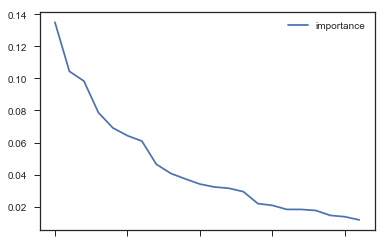

In [484]:
feature_importances.plot.line()

In [485]:
feature_importances

,importance
PPE,0.134967
MDVP:Fo(Hz),0.104378
spread1,0.098332
MDVP:RAP,0.078660
MDVP:Flo(Hz),0.069120
MDVP:Fhi(Hz),0.064300
Jitter:DDP,0.060911
MDVP:Shimmer,0.046456
D2,0.040765
Shimmer:DDA,0.037340


In [530]:
#Redoing it considering the output of Feature Importance
from sklearn.model_selection import train_test_split
park1=park.iloc[:,[1,6,8,17,20,23]]
X =  park1.drop("status", axis=1)
y =  park1.pop("status")
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [708]:
rf = RandomForestClassifier(n_estimators = 42, random_state = 42,max_depth=6,min_samples_leaf=2,
                            max_features=3, criterion='entropy', oob_score=False)
rfc= rf.fit(train_set, train_labels)
predRF= rfc.predict(test_set)

In [709]:
print("Accuracy:",metrics.accuracy_score(test_labels, predRF))

Accuracy: 0.8983050847457628


In [ ]:
#Random Forest shows exactly same result as Desision Tree.
#Best Result is given by 42 Trees

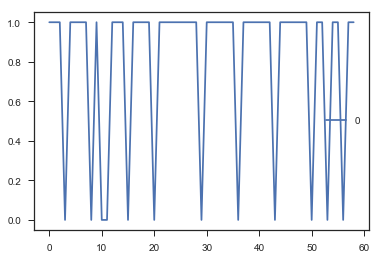

In [430]:
pd.DataFrame(predRF).plot.line()